In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('../python/methods.py', 'r') as file:
    exec(file.read())

with open('../python/methods_for_r.py', 'r') as file:
    exec(file.read())

In [3]:
samples = pd.read_csv('../sample_sheet.csv')

In [4]:
def find_ap(signal, time, ap_threshold = -10):
    over_threshold = np.where(signal > ap_threshold)[0]

    if len(over_threshold) == 0:
        return []

    idx_diff = np.where(np.diff(over_threshold) != 1)[0]
    ap_count = np.append(over_threshold[0], over_threshold[idx_diff + 1])

    return time[ap_count]

In [5]:
full = pd.read_csv('../output/spontaneous-movement-2/figures/event_data.csv')

In [6]:
def create_event_id(row):
    return f'{row["EventId"]}_{row["SID"]}'

In [7]:
full['Event'] = full.apply(create_event_id, axis = 1)

In [8]:
full.head()

,Time,EMG,VM,TKEO,SID,Region,EventId,EventStart,Event
0,0.00000,0.005715,-76.229248,0.009906,W1_C1,S1_L23,0,0.4,0_W1_C1
1,0.00005,-0.018005,-76.383003,0.009897,W1_C1,S1_L23,0,0.4,0_W1_C1
2,0.00010,-0.040815,-76.260002,0.009887,W1_C1,S1_L23,0,0.4,0_W1_C1
3,0.00015,-0.060760,-76.075500,0.009877,W1_C1,S1_L23,0,0.4,0_W1_C1
4,0.00020,-0.074618,-76.352249,0.009868,W1_C1,S1_L23,0,0.4,0_W1_C1


In [9]:
unique_events = np.unique(full['Event'])

In [10]:
len(unique_events)

866

In [11]:
ap_threshold = -20
aps = []
for index, event in enumerate(unique_events):
    print(index)
    signal = full[full['Event'] == event]['VM'].values
    time = full[full['Event'] == event]['Time'].values
    signal_ap = find_ap(signal, time, ap_threshold = ap_threshold)
    
    aps.append(pd.DataFrame({
        'Trial': event,
        'Time': signal_ap
    }))

aps = pd.concat(aps)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


KeyboardInterrupt: 

In [41]:
aps.to_csv('../figures/all_ap_time.csv')

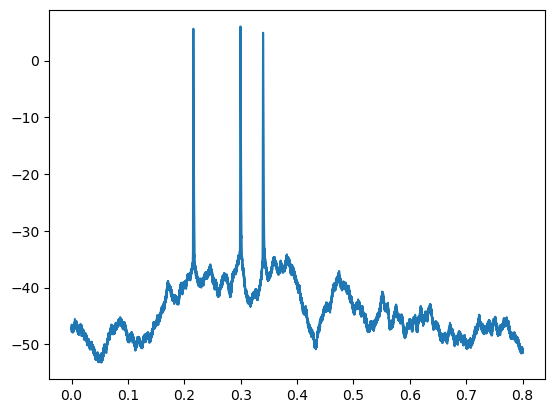